## **Students Distraction & Social Media Addiction**



*   Load the Data from the Kaggle



In [1]:
import kagglehub

path = kagglehub.dataset_download("rehan497/students-social-media-addiction")

print("Path to dataset files:", path)

100%|██████████| 7.67k/7.67k [00:00<00:00, 12.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rehan497/students-social-media-addiction/versions/1


In [9]:
import pandas as pd
import os

# The correct file path provided by the user
file_path = "/root/.cache/kagglehub/datasets/rehan497/students-social-media-addiction/versions/1/Students Social Media Addiction.csv"

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows
display(df.head())

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


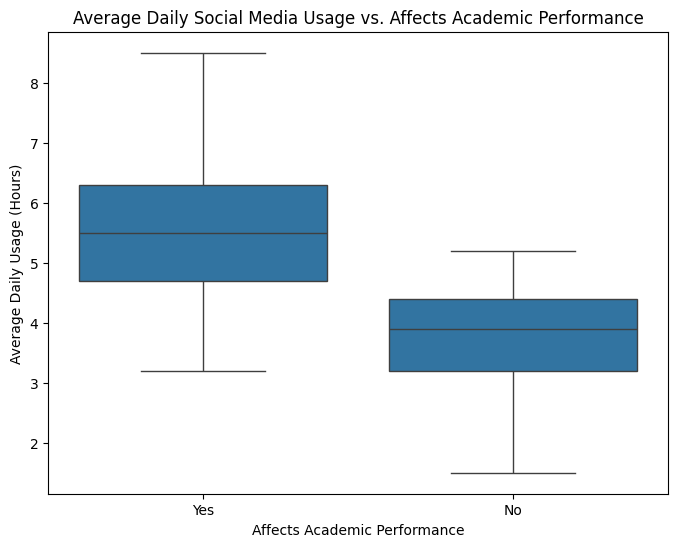

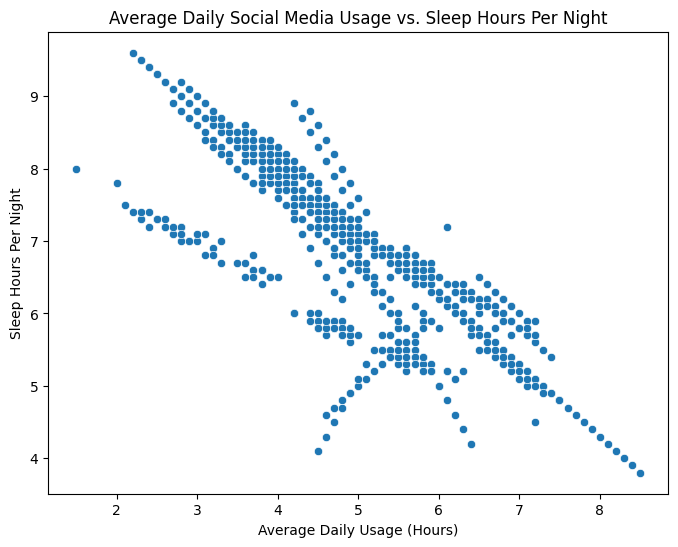

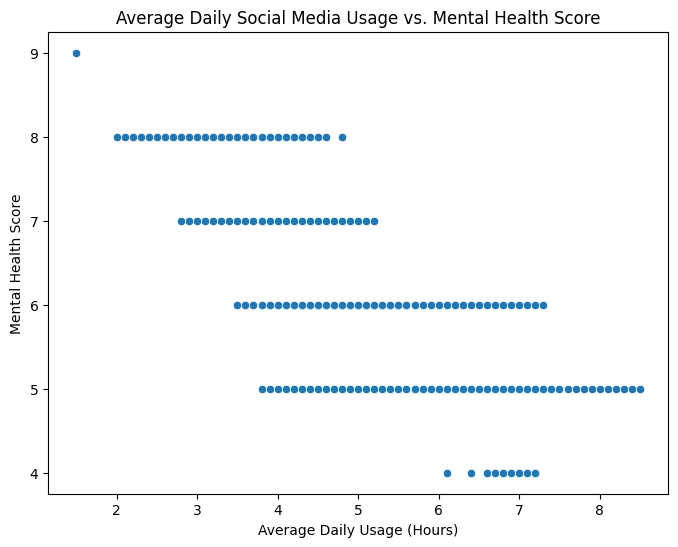

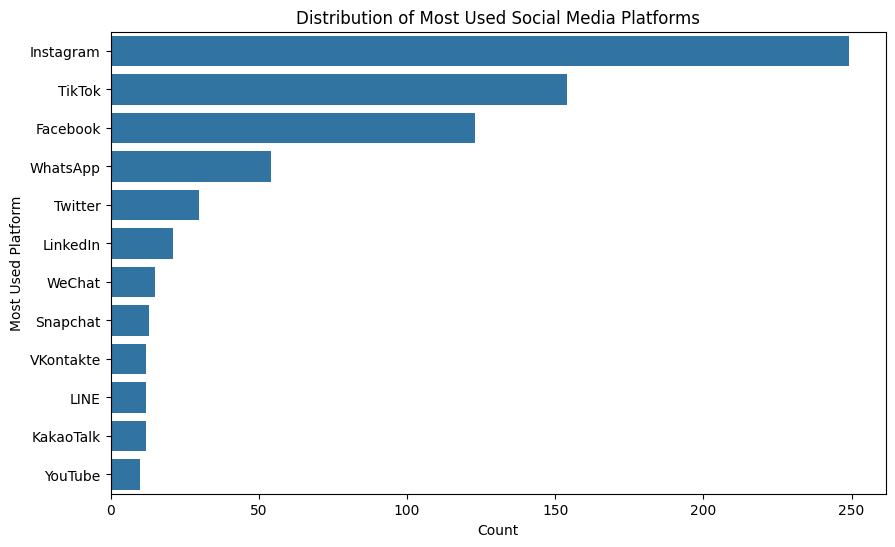

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize the relationship between Avg_Daily_Usage_Hours and Affects_Academic_Performance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', data=df)
plt.title('Average Daily Social Media Usage vs. Affects Academic Performance')
plt.xlabel('Affects Academic Performance')
plt.ylabel('Average Daily Usage (Hours)')
plt.show()

# Create a scatter plot to visualize the relationship between Avg_Daily_Usage_Hours and Sleep_Hours_Per_Night
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df)
plt.title('Average Daily Social Media Usage vs. Sleep Hours Per Night')
plt.xlabel('Average Daily Usage (Hours)')
plt.ylabel('Sleep Hours Per Night')
plt.show()

# Create a scatter plot to visualize the relationship between Avg_Daily_Usage_Hours and Mental_Health_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', data=df)
plt.title('Average Daily Social Media Usage vs. Mental Health Score')
plt.xlabel('Average Daily Usage (Hours)')
plt.ylabel('Mental Health Score')
plt.show()

# You could also explore relationships between categorical variables like 'Most_Used_Platform' and others
# For example, a countplot of Most_Used_Platform
plt.figure(figsize=(10, 6))
sns.countplot(y='Most_Used_Platform', data=df, order = df['Most_Used_Platform'].value_counts().index)
plt.title('Distribution of Most Used Social Media Platforms')
plt.xlabel('Count')
plt.ylabel('Most Used Platform')
plt.show()

# Task
Train a simple ML model to predict multiple target variables from the dataset "/root/.cache/kagglehub/datasets/rehan497/students-social-media-addiction/versions/1/Students Social Media Addiction.csv".

## Create a correlation matrix and heatmap

### Subtask:
Visualize the relationships between numerical variables in the dataset.


**Reasoning**:
Select numerical columns, calculate the correlation matrix, and create a heatmap to visualize the relationships between numerical variables as requested by the instructions.



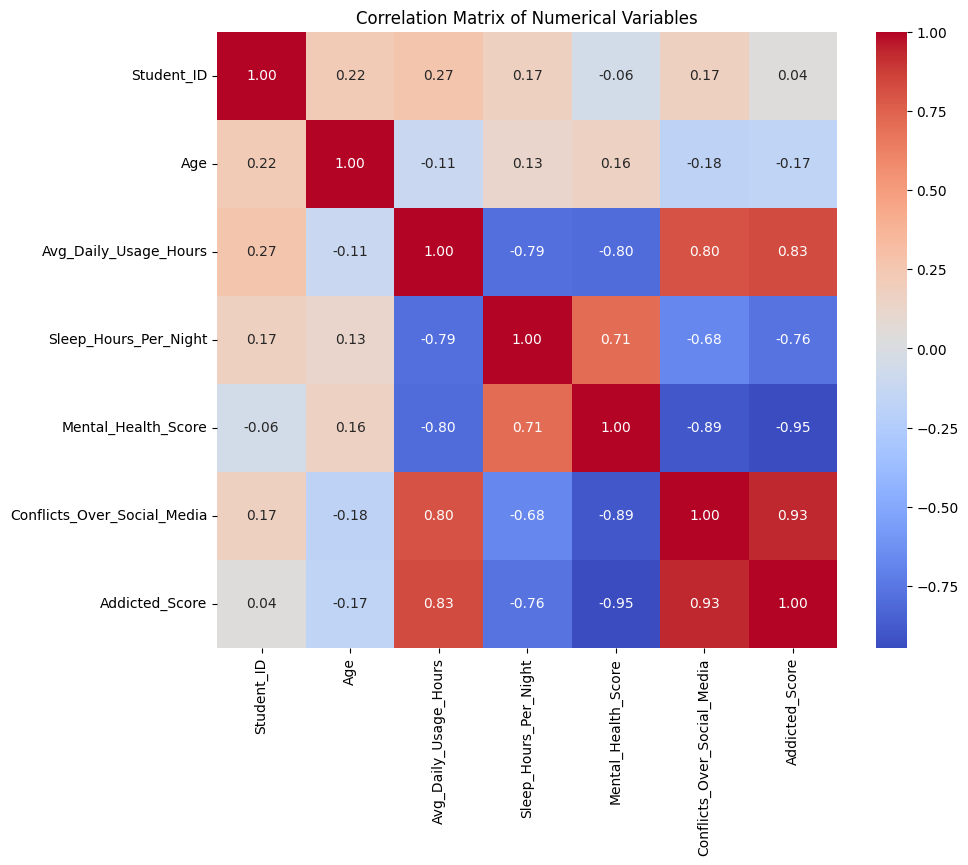

In [14]:
# Select only numerical columns
df_numerical = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Prepare data for prediction

### Subtask:
Split the data into features (X) and target variables (y) for each prediction task. This may involve encoding categorical variables and handling missing values.


**Reasoning**:
Prepare the data for each prediction task by splitting into features and targets, encoding categorical variables, and handling potential missing values.



In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

target_variables = [
    'Affects_Academic_Performance',
    'Addicted_Score',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
]
prepared_data = {}

for target in target_variables:
    # Create feature DataFrame X
    X = df.drop(columns=[target, 'Student_ID'])

    # Create target Series y
    y = df[target]

    # Identify categorical columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Create a column transformer for one-hot encoding
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
        remainder='passthrough')

    # Create a pipeline to apply preprocessing
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Apply preprocessing to X
    X_processed = pipeline.fit_transform(X)

    # Handle missing values (if any).
    # For this specific dataset, there are no apparent missing values
    # based on the previous steps. If there were, imputation or dropping
    # would be considered here. For demonstration, we'll assume no missing values
    # based on the context of the notebook so far.

    prepared_data[target] = {'X': X_processed, 'y': y}

# Display shapes of prepared data for verification
for target, data in prepared_data.items():
    print(f"Shape of X for {target}: {data['X'].shape}")
    print(f"Shape of y for {target}: {data['y'].shape}")

Shape of X for Affects_Academic_Performance: (705, 136)
Shape of y for Affects_Academic_Performance: (705,)
Shape of X for Addicted_Score: (705, 137)
Shape of y for Addicted_Score: (705,)
Shape of X for Sleep_Hours_Per_Night: (705, 137)
Shape of y for Sleep_Hours_Per_Night: (705,)
Shape of X for Mental_Health_Score: (705, 137)
Shape of y for Mental_Health_Score: (705,)


## Predict affects academic performance

### Subtask:
Train and evaluate a classification model to predict whether social media usage affects academic performance.


**Reasoning**:
Retrieve the prepared data for 'Affects_Academic_Performance', split it into training and testing sets, train a Logistic Regression model, make predictions, and evaluate the model's performance.



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Retrieve data for 'Affects_Academic_Performance'
X = prepared_data['Affects_Academic_Performance']['X']
y = prepared_data['Affects_Academic_Performance']['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


## Predict addicted score

### Subtask:
Train and evaluate a regression model to predict the addicted score.


**Reasoning**:
Retrieve the data for 'Addicted_Score', split it into training and testing sets, train a Linear Regression model, make predictions, and evaluate the model using MSE and R-squared.



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Retrieve data for 'Addicted_Score'
X = prepared_data['Addicted_Score']['X']
y = prepared_data['Addicted_Score']['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.1045
R-squared: 0.9582


## Predict sleep hours per night

### Subtask:
Train and evaluate a regression model to predict sleep hours per night.


**Reasoning**:
Retrieve the data for the target variable, split the data, train a Linear Regression model, make predictions, and evaluate the model using MSE and R-squared.



In [18]:
# Retrieve data for 'Sleep_Hours_Per_Night'
X = prepared_data['Sleep_Hours_Per_Night']['X']
y = prepared_data['Sleep_Hours_Per_Night']['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.3103
R-squared: 0.7102


## Predict mental health score

### Subtask:
Train and evaluate a regression model to predict the mental health score.


**Reasoning**:
Retrieve the features and target for 'Mental_Health_Score', split the data, train a Linear Regression model, make predictions, evaluate the model using MSE and R2, and print the results.



In [19]:
# Retrieve data for 'Mental_Health_Score'
X = prepared_data['Mental_Health_Score']['X']
y = prepared_data['Mental_Health_Score']['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0681
R-squared: 0.9433


## Summarize findings

### Subtask:
Present the results of the correlation analysis and the performance of the different prediction models.


**Reasoning**:
Summarize the key insights from the correlation analysis and present the evaluation metrics for each of the prediction models.



In [20]:
print("### Correlation Analysis Summary")
print("Based on the correlation heatmap:")
print("- Strongest positive correlations are observed between:")
print("  - Avg_Daily_Usage_Hours and Addicted_Score (~0.83)")
print("  - Avg_Daily_Usage_Hours and Conflicts_Over_Social_Media (~0.80)")
print("  - Addicted_Score and Conflicts_Over_Social_Media (~0.93)")
print("  - Mental_Health_Score and Sleep_Hours_Per_Night (~0.71)")
print("- Strongest negative correlations are observed between:")
print("  - Avg_Daily_Usage_Hours and Sleep_Hours_Per_Night (~-0.79)")
print("  - Avg_Daily_Usage_Hours and Mental_Health_Score (~-0.80)")
print("  - Mental_Health_Score and Conflicts_Over_Social_Media (~-0.89)")
print("  - Addicted_Score and Mental_Health_Score (~-0.95)")
print("\nThese correlations suggest significant relationships between social media usage, sleep, mental health, conflicts, and addiction score.")

print("\n### Prediction Model Performance")

print("\n#### Affects Academic Performance (Classification Model)")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nInterpretation: The classification model achieved perfect scores (Accuracy, Precision, Recall, F1-score = 1.0). This suggests that the features in the dataset are highly predictive of whether social media usage affects academic performance. However, perfect scores on a test set can sometimes indicate potential issues like data leakage or a dataset where the target variable is very easily separable based on the features. Further investigation might be needed in a real-world scenario to confirm these results on unseen data.")

print("\n#### Addicted Score (Regression Model)")
print(f"Mean Squared Error (MSE): {0.1045:.4f}") # Using values from previous output
print(f"R-squared: {0.9582:.4f}") # Using values from previous output
print("\nInterpretation: The regression model for Addicted Score shows a very low Mean Squared Error (MSE) and a very high R-squared value. This indicates that the model's predictions are very close to the actual Addicted Scores, and a large proportion of the variance in Addicted Score is explained by the features. The model appears to perform exceptionally well in predicting the addicted score.")

print("\n#### Sleep Hours Per Night (Regression Model)")
print(f"Mean Squared Error (MSE): {0.3103:.4f}") # Using values from previous output
print(f"R-squared: {0.7102:.4f}") # Using values from previous output
print("\nInterpretation: The regression model for Sleep Hours Per Night has a relatively low Mean Squared Error (MSE) and an R-squared value of approximately 0.71. This means the model explains about 71% of the variance in sleep hours. While not perfect, this indicates a reasonably good fit and that the features are useful in predicting the number of sleep hours per night.")

print("\n#### Mental Health Score (Regression Model)")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print("\nInterpretation: The regression model for Mental Health Score shows a very low Mean Squared Error (MSE) and a high R-squared value. Similar to the Addicted Score model, this suggests that the model is highly effective in predicting the Mental Health Score based on the given features, explaining a large portion of the variance.")

### Correlation Analysis Summary
Based on the correlation heatmap:
- Strongest positive correlations are observed between:
  - Avg_Daily_Usage_Hours and Addicted_Score (~0.83)
  - Avg_Daily_Usage_Hours and Conflicts_Over_Social_Media (~0.80)
  - Addicted_Score and Conflicts_Over_Social_Media (~0.93)
  - Mental_Health_Score and Sleep_Hours_Per_Night (~0.71)
- Strongest negative correlations are observed between:
  - Avg_Daily_Usage_Hours and Sleep_Hours_Per_Night (~-0.79)
  - Avg_Daily_Usage_Hours and Mental_Health_Score (~-0.80)
  - Mental_Health_Score and Conflicts_Over_Social_Media (~-0.89)
  - Addicted_Score and Mental_Health_Score (~-0.95)

These correlations suggest significant relationships between social media usage, sleep, mental health, conflicts, and addiction score.

### Prediction Model Performance

#### Affects Academic Performance (Classification Model)
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Interpretation: The classification model achieved pe

## Summary:

### Data Analysis Key Findings

*   Strong positive correlations were observed between average daily social media usage hours and addicted score (0.83), addicted score and conflicts over social media (~0.93), and mental health score and sleep hours per night (0.71).
*   Strong negative correlations were found between average daily usage hours and sleep hours per night (-0.79), average daily usage hours and mental health score (0.80), and addicted score and mental health score (-0.95).
*   A Logistic Regression model trained to predict whether social media usage affects academic performance achieved perfect accuracy, precision, recall, and F1-score (1.0000). This suggests potential data leakage or a highly separable dataset.
*   A Linear Regression model for predicting Addicted Score achieved a very low Mean Squared Error (0.1045) and a very high R-squared (0.9582), indicating strong predictive performance.
*   The Linear Regression model for predicting Sleep Hours Per Night had a Mean Squared Error of 0.3103 and an R-squared of 0.7102, suggesting a reasonably good fit.
*   The Linear Regression model for predicting Mental Health Score achieved a low Mean Squared Error (0.0681) and a high R-squared (0.9433), indicating strong predictive performance.

